# Tidy Tuesday: What is on Netflix?
**July 29, 2025**

Today's goal is to analyze what's being viewed on Netflix so far in 2025.

## Imports

In [1]:
# Import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data
movies = pd.read_csv('movies.csv')

## Clean the data
**Cleaning the `movies` data first**

In [3]:
# Preview data
movies.head()

,source,report,title,available_globally,release_date,hours_viewed,runtime,views
0,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Back in Action,Yes,2025-01-17,313000000.0,1H 54M 0S,164700000.0
1,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,STRAW,Yes,2025-06-06,185200000.0,1H 48M 0S,102900000.0
2,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,The Life List,Yes,2025-03-28,198900000.0,2H 5M 0S,95500000.0
3,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Exterritorial,Yes,2025-04-30,159000000.0,1H 49M 0S,87500000.0
4,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Havoc,Yes,2025-04-25,154900000.0,1H 47M 0S,86900000.0


`source` can be dropped. Irrelevant data.

In [4]:
# Drop source column
movies = movies.drop(columns='source')

# We want to only look at what's being viewd in 2025
movies.report.value_counts()

report
2023Jul-Dec    9399
2024Jan-Jun    9364
2024Jul-Dec    8684
2025Jan-Jun    8674
Name: count, dtype: int64

**8,674** movies have been recorded for 2025. I will create a mask below:

In [5]:
# Create mask
movies = movies[movies['report'] == '2025Jan-Jun']
movies.head()

,report,title,available_globally,release_date,hours_viewed,runtime,views
0,2025Jan-Jun,Back in Action,Yes,2025-01-17,313000000.0,1H 54M 0S,164700000.0
1,2025Jan-Jun,STRAW,Yes,2025-06-06,185200000.0,1H 48M 0S,102900000.0
2,2025Jan-Jun,The Life List,Yes,2025-03-28,198900000.0,2H 5M 0S,95500000.0
3,2025Jan-Jun,Exterritorial,Yes,2025-04-30,159000000.0,1H 49M 0S,87500000.0
4,2025Jan-Jun,Havoc,Yes,2025-04-25,154900000.0,1H 47M 0S,86900000.0


In [6]:
# Check data types
movies.dtypes

report                 object
title                  object
available_globally     object
release_date           object
hours_viewed          float64
runtime                object
views                 float64
dtype: object

I will like to store the `runtime` in the form of hours so I can compare calculations with the `hours_viewed` column. In addition, `release_date` could benefit from converting it into a *datetime* format.\
Otherwise, the data types are fine as it.

In [7]:
# Convert runtime to hours
movies = movies.dropna().reset_index(drop=True) # Drop NAs
# Split runtime up into hour, minute, sec
movies[['hour', 'min', 'sec']] = movies['runtime'].str.split(expand=True)
movies.head()

,report,title,available_globally,release_date,hours_viewed,runtime,views,hour,min,sec
0,2025Jan-Jun,Back in Action,Yes,2025-01-17,313000000.0,1H 54M 0S,164700000.0,1H,54M,0S
1,2025Jan-Jun,STRAW,Yes,2025-06-06,185200000.0,1H 48M 0S,102900000.0,1H,48M,0S
2,2025Jan-Jun,The Life List,Yes,2025-03-28,198900000.0,2H 5M 0S,95500000.0,2H,5M,0S
3,2025Jan-Jun,Exterritorial,Yes,2025-04-30,159000000.0,1H 49M 0S,87500000.0,1H,49M,0S
4,2025Jan-Jun,Havoc,Yes,2025-04-25,154900000.0,1H 47M 0S,86900000.0,1H,47M,0S


In [8]:
# Remove the non-numerical characters from the split up time columns
# Also convert into numericals
movies['hour'] = pd.to_numeric(movies['hour'].str[:-1])
movies['min'] = pd.to_numeric(movies['min'].str[:-1])
movies['sec'] = pd.to_numeric(movies['sec'].str[:-1])
movies.head()

,report,title,available_globally,release_date,hours_viewed,runtime,views,hour,min,sec
0,2025Jan-Jun,Back in Action,Yes,2025-01-17,313000000.0,1H 54M 0S,164700000.0,1,54,0.0
1,2025Jan-Jun,STRAW,Yes,2025-06-06,185200000.0,1H 48M 0S,102900000.0,1,48,0.0
2,2025Jan-Jun,The Life List,Yes,2025-03-28,198900000.0,2H 5M 0S,95500000.0,2,5,0.0
3,2025Jan-Jun,Exterritorial,Yes,2025-04-30,159000000.0,1H 49M 0S,87500000.0,1,49,0.0
4,2025Jan-Jun,Havoc,Yes,2025-04-25,154900000.0,1H 47M 0S,86900000.0,1,47,0.0


In [9]:
# Create column of movie length in hours
movie_length = []

for row in range(len(movies)):
    # Convert the hour, min, and sec values to hour
    time_hour = movies['hour'][row]
    time_min = movies['min'][row] / 60
    time_sec = movies['sec'][row] / 60 / 60
    # Add the time values up
    movie_length.append( round(time_hour + time_min + time_sec, 2) )

# New column introduced
movies['movie_length'] = movie_length
movies.head()

,report,title,available_globally,release_date,hours_viewed,runtime,views,hour,min,sec,movie_length
0,2025Jan-Jun,Back in Action,Yes,2025-01-17,313000000.0,1H 54M 0S,164700000.0,1,54,0.0,1.90
1,2025Jan-Jun,STRAW,Yes,2025-06-06,185200000.0,1H 48M 0S,102900000.0,1,48,0.0,1.80
2,2025Jan-Jun,The Life List,Yes,2025-03-28,198900000.0,2H 5M 0S,95500000.0,2,5,0.0,2.08
3,2025Jan-Jun,Exterritorial,Yes,2025-04-30,159000000.0,1H 49M 0S,87500000.0,1,49,0.0,1.82
4,2025Jan-Jun,Havoc,Yes,2025-04-25,154900000.0,1H 47M 0S,86900000.0,1,47,0.0,1.78


In [10]:
# Convert release_date to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'])

# Drop report, runtime, and the time splits
movies = movies.drop(columns=['report', 'runtime', 'hour', 'min', 'sec'])
movies.head()

,title,available_globally,release_date,hours_viewed,views,movie_length
0,Back in Action,Yes,2025-01-17,313000000.0,164700000.0,1.90
1,STRAW,Yes,2025-06-06,185200000.0,102900000.0,1.80
2,The Life List,Yes,2025-03-28,198900000.0,95500000.0,2.08
3,Exterritorial,Yes,2025-04-30,159000000.0,87500000.0,1.82
4,Havoc,Yes,2025-04-25,154900000.0,86900000.0,1.78


In [11]:
# Final check for data types
movies.dtypes

title                         object
available_globally            object
release_date          datetime64[ns]
hours_viewed                 float64
views                        float64
movie_length                 float64
dtype: object

All set for movies.

## Movie analysis
Some questions to answer:
1. What are the top 10 most watched movies in 2025 so far?
2. What are the popular movies released in 2025 so far?
3. What are the longest movies being most watched? The shortest?
4. Does global availability matter?

**1) Top 10 most watched movies in 2025**

In [12]:
# Top 10 most watched movies
top10_views = movies.sort_values(by='views', ascending=False)[:10]
top10_views

,title,available_globally,release_date,hours_viewed,views,movie_length
0,Back in Action,Yes,2025-01-17,313000000.0,164700000.0,1.90
1,STRAW,Yes,2025-06-06,185200000.0,102900000.0,1.80
2,The Life List,Yes,2025-03-28,198900000.0,95500000.0,2.08
3,Exterritorial,Yes,2025-04-30,159000000.0,87500000.0,1.82
4,Havoc,Yes,2025-04-25,154900000.0,86900000.0,1.78
5,The Electric State,Yes,2025-03-14,158200000.0,74200000.0,2.13
6,Counterattack // Contraataque,Yes,2025-02-28,101000000.0,71300000.0,1.42
7,Ad Vitam,Yes,2025-01-10,114000000.0,69800000.0,1.63
8,Kinda Pregnant,Yes,2025-02-05,98100000.0,58900000.0,1.67
9,Nonnas,Yes,2025-05-09,109500000.0,57600000.0,1.90


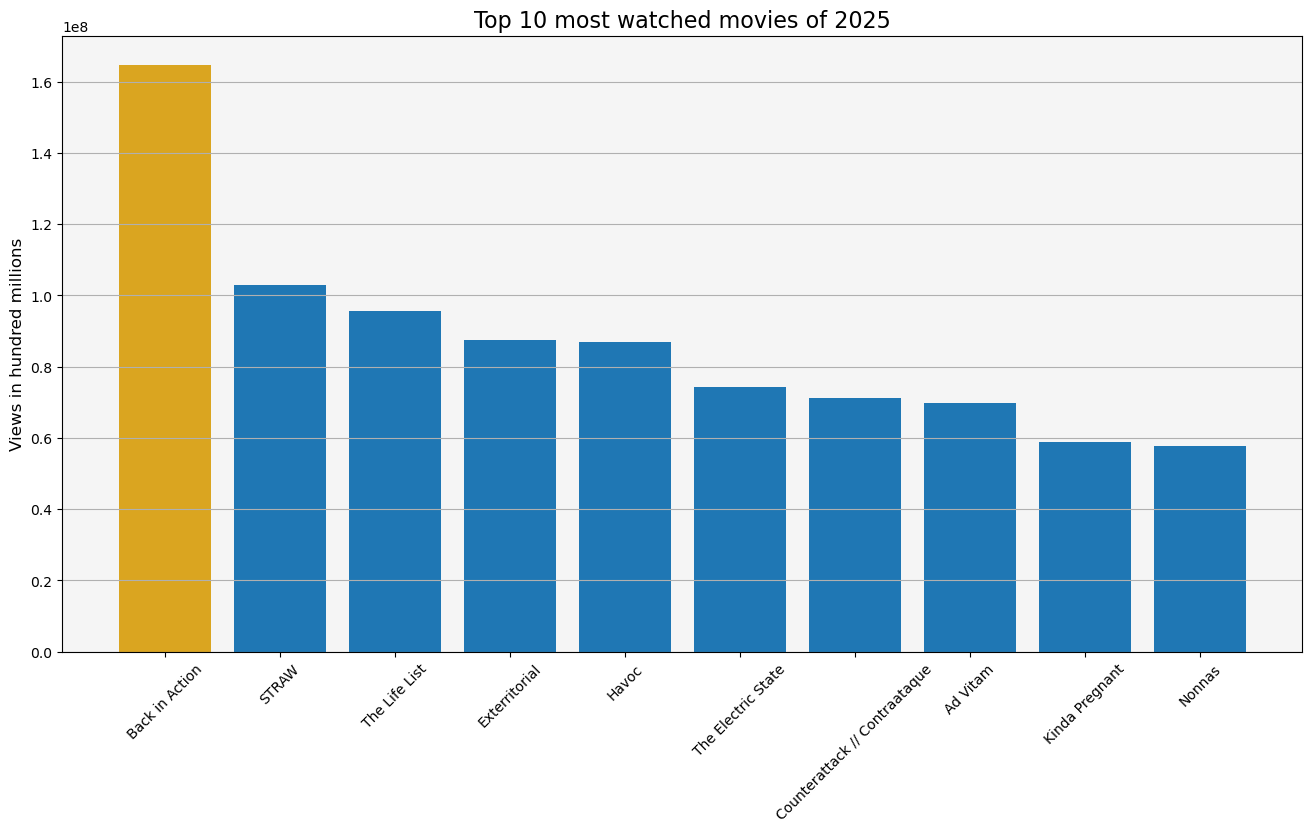

In [13]:
fig, ax = plt.subplots(figsize=(16,8))

ax.bar(top10_views['title'], top10_views['views'])
ax.bar(top10_views['title'][0], top10_views['views'][0], color='goldenrod')
ax.tick_params('x', rotation=45)
ax.set_ylabel('Views in hundred millions', size=12)
ax.set_facecolor('whitesmoke')
ax.grid(axis='y')
ax.set_title('Top 10 most watched movies of 2025', size=16)

plt.show()

**2) Top 10 most watched movies in 2025, released in 2025**

In [14]:
# Filter for a release date in 2025
top10_2025 = movies[movies['release_date'].dt.year == 2025]
top10_2025 = top10_2025.sort_values(by='views', ascending=False)[:10]
top10_2025

,title,available_globally,release_date,hours_viewed,views,movie_length
0,Back in Action,Yes,2025-01-17,313000000.0,164700000.0,1.90
1,STRAW,Yes,2025-06-06,185200000.0,102900000.0,1.80
2,The Life List,Yes,2025-03-28,198900000.0,95500000.0,2.08
3,Exterritorial,Yes,2025-04-30,159000000.0,87500000.0,1.82
4,Havoc,Yes,2025-04-25,154900000.0,86900000.0,1.78
5,The Electric State,Yes,2025-03-14,158200000.0,74200000.0,2.13
6,Counterattack // Contraataque,Yes,2025-02-28,101000000.0,71300000.0,1.42
7,Ad Vitam,Yes,2025-01-10,114000000.0,69800000.0,1.63
8,Kinda Pregnant,Yes,2025-02-05,98100000.0,58900000.0,1.67
9,Nonnas,Yes,2025-05-09,109500000.0,57600000.0,1.90


It appears that in Netflix, ***the top 10 movies watched in 2025 were all released in 2025 as well***.

**3) Longest and shortest movies being watched**

In [15]:
# Longest movies
# Sort by movie_length
longest10 = movies.sort_values(by='movie_length', ascending=False)[:10]
longest10 = longest10.sort_values(by='views', ascending=False)
longest10

,title,available_globally,release_date,hours_viewed,views,movie_length
163,The Irishman,Yes,2019-11-27,24800000.0,7100000.0,3.48
461,Rebel Moon — Part One: Director’s Cut,Yes,2024-08-02,7200000.0,2100000.0,3.40
481,Rebel Moon — Part Two: Director’s Cut,Yes,2024-08-02,5900000.0,2000000.0,2.88
754,¡Que viva México!,Yes,2023-05-11,2900000.0,900000.0,3.18
908,How I Fell in Love with a Gangster // Jak poko...,Yes,2022-01-05,1800000.0,600000.0,3.10
909,A Fortunate Man // Lykke-Per,Yes,2019-04-19,1600000.0,600000.0,2.78
1061,Blonde,Yes,2022-09-28,1200000.0,400000.0,2.78
1062,Pretty Guardian Sailor Moon Cosmos The Movie: ...,Yes,2024-08-22,1200000.0,400000.0,2.70
1159,Jaadugar // जादूगर,Yes,2022-07-15,900000.0,300000.0,2.78
1429,Bill Russell: Legend,Yes,2023-02-08,400000.0,100000.0,3.33


Of the top 10 longest movies on Netflix, *The Irishman* is the most viewed.

In [16]:
# Shortest movies
# Sort by movie_length
longest10 = movies.sort_values(by='movie_length', ascending=True)[:10]
longest10 = longest10.sort_values(by='views', ascending=False)
longest10

,title,available_globally,release_date,hours_viewed,views,movie_length
97,Untold: The Fall of Favre,Yes,2025-05-20,11500000.0,10800000.0,1.07
143,Untold: The Liver King,Yes,2025-05-13,8900000.0,7900000.0,1.13
432,Ivy + Bean: The Ghost That Had to Go,Yes,2022-09-02,2400000.0,2400000.0,1.02
431,Baki Hanma VS Kengan Ashura // 範馬刃牙VSケンガンアシュラ,Yes,2024-06-06,2500000.0,2400000.0,1.05
500,Inside the Mind of a Cat,Yes,2022-08-18,2300000.0,2000000.0,1.13
520,Pokémon: The Arceus Chronicles,No,2022-09-23,2100000.0,1900000.0,1.08
752,Unknown: Cosmic Time Machine,Yes,2023-07-24,1100000.0,1000000.0,1.08
1263,Untold: The Rise and Fall of AND1,Yes,2022-08-23,300000.0,300000.0,1.15
1415,Los Tigres del Norte at Folsom Prison // Los T...,No,2019-09-15,200000.0,200000.0,1.07
1629,Horrid Henry's Gross Day Out,No,2020-09-17,100000.0,100000.0,1.02


Of the top 10 shortest movies on Netflix, *Untold: The Fall of Favre* is the most viewed.

**4) Are most movies available globally?**

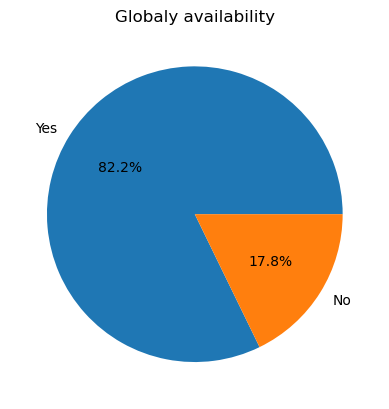

In [17]:
# Use value_counts to gather counts
ag = movies['available_globally'].value_counts().reset_index(name='counts')

fig, ax = plt.subplots()
ax.pie(ag['counts'], labels=ag['available_globally'], autopct='%1.1f%%')
ax.set_title('Globaly availability')
plt.show()

In [18]:
ag

,available_globally,counts
0,Yes,1424
1,No,308


## Finished

Looking back:
* First time I ever created a pie chart in matplotlib.
* Nice refresher on manipulating dataframes. Between data cleaning and analysis, I had to mask, filter, sort, etc. to get the results I needed.